In [1]:
import pandas as pd
import seaborn as sb
from scipy import stats as st
import numpy as np
from math import factorial
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


            

In [2]:
games=pd.read_csv("/datasets/games.csv")

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
#Change column names to lowercase
games=games.rename(columns=str.lower)

In [5]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
games.duplicated().sum()

0

In [7]:
games.isna().sum()
games.isna().sum()/ len(games)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

*  It appears that the majority of missing data lies in the critic score, user score and rating. It would not be possible to fill these columns in with arbituary values, so I will fill them with 0 so they do not impact further calculations.

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#Change year column to datetime
games["year_of_release"] = pd.to_datetime(games["year_of_release"], format= "%Y")

* Here the year_of_release column will be converted to datetime for ease in analysis.

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [11]:
games["name"].isna().sum()
games.loc[(games["critic_score"] == np.nan) & (games["platform"]== np.nan)]
games.query('name == "NaN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [12]:
games["platform"].isna().sum()

0

In [13]:
games[["name"]].value_counts()
games["user_score"].value_counts()
games[games["user_score"] == "0"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008-01-01,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


* This marks the one ["user_score"] row that == 0 prior to fillna(0)

In [14]:
games["name"].nunique()
games["name"].isna().sum()


2

In [15]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
games["user_score"].value_counts()


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [17]:
games["user_score"].fillna(0, inplace=True)
games["user_score"].replace("tbd", 0, inplace=True)


* Above, all missing values and "tbd" values in the user_score are replaced with 0 in order to (1) be able to convert user_score dtype to float type and (2) make calculations easier

In [18]:
games["user_score"].value_counts()

0      9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
2.3       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

* No more "tbd" values

In [19]:
games["user_score"].isna().sum()

0

* No more missing values

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       16715 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [21]:
#Change user_score from object to float type
games["user_score"] = games["user_score"].astype(float)
games["user_score"].value_counts()

0.0    9126
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
0.6       2
1.0       2
1.5       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       16715 non-null  float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


* All missing values and "tbd" values were converted to "0", as they cannot be dropped due to the large proportion of data they hold. They were converted to "0" to make processing the data more useful. The user score column datatype was also changed to float type.

In [23]:
games["critic_score"]

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

In [24]:
games[games["name"] == "Need for Speed: Most Wanted"]
nfs_data = games.query('name =="Need for Speed: Most Wanted"')
nfs_data["critic_score"].mean()
print(nfs_data["user_score"].mean())

mean = int(nfs_data["critic_score"].mean().round())
mean



6.283333333333334


78

In [27]:
games["rating"].fillna("Unknown", inplace=True)
games["critic_score"].fillna(0, inplace=True)

games[games["genre"].isna() & games["name"].isna()]



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,0.0,0.0,Unknown
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,0.0,0.0,Unknown


In [28]:
games.drop([659, 14244], inplace=True)

* Above indicates that same 2 rows that have a missing name also have missing ratings, so I dropped these rows, as they will not provide useful information about sales with respect to genre. 

In [29]:
games.isna().sum()
print(len(games[games["year_of_release"].isna()]) /len(games))

games.isna().sum()

0.016095255190570215


name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [30]:
games.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [31]:
games=games.dropna(subset=["year_of_release"])

In [32]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

* At this point, all of the missing data have been dealt with. For the "year_of_release" and "rating", missing values have been replaced with "Unknown". For user_score and critic_score, missing values have been replaced with "0". 
* Because the proportion of data was so large, I chose this way to treat them as this ensures that I am not incorrectly filling them in and I am not removing chunks of data from the dataset.

In [33]:
games.columns
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown


In [34]:
#Creating a new column to indicate total global sales 
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

In [35]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


In [36]:
games["year"]= games["year_of_release"].dt.year
games.isna().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
year               0
dtype: int64

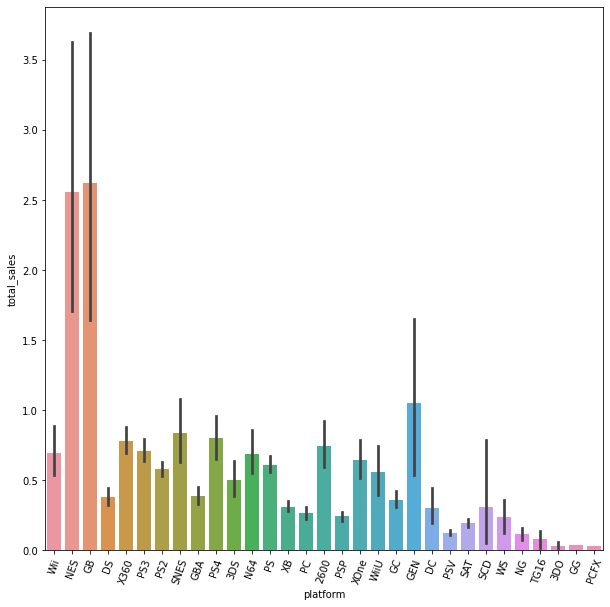

In [37]:
#Total sales per platform
data =games.groupby(["platform"])["total_sales"].sum()
plt.figure(figsize=(10,10))
y=sb.barplot(x="platform", y="total_sales", data=games)
y.set_xticklabels(y.get_xticklabels(),rotation=70)
plt.show()

* NES appears to be the platform that generates the highest total sales, with GB being a close second. These are the two platforms that I will select for my analsis

In [38]:
plat= games.groupby(["platform", "year_of_release"])["total_sales"].sum()


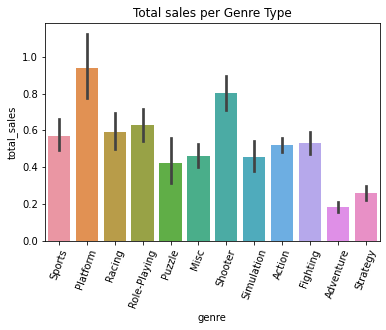

<Figure size 720x720 with 0 Axes>

In [39]:
#Total sales per genre
data2=games.groupby(["genre"])["total_sales"].sum()
v=sb.barplot(x="genre", y="total_sales", data=games)
plt.figure(figsize=(10,10))
v.set_xticklabels(v.get_xticklabels(),rotation=70)
v.set(title="Total sales per Genre Type")
plt.show()

* The genre that has the top sales here is Platform. Other popular types include role-playing as well as Shooter and Fighting.

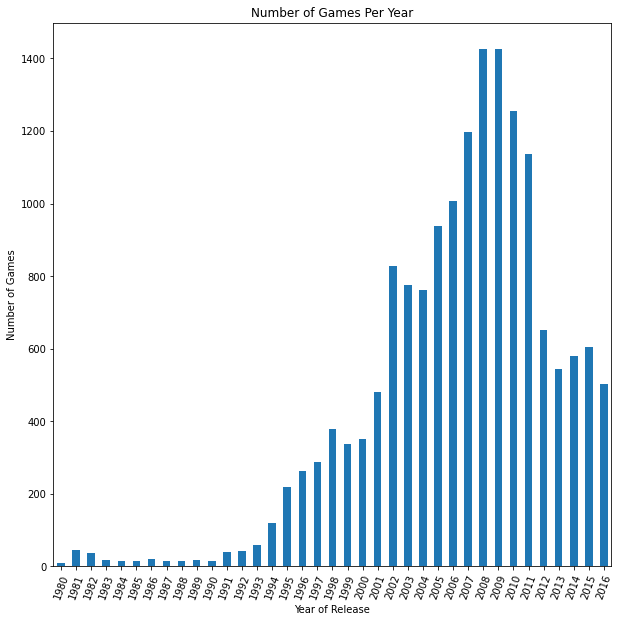

In [40]:
#Number of games per year
games_filtered_year= games.query('year != 0.0')
p=games_filtered_year.groupby(["year"])["name"].count().plot(kind="bar", figsize=(10,10))
p.set_xticklabels(p.get_xticklabels(),rotation=70)
plt.ylabel("Number of Games")
plt.xlabel("Year of Release")
plt.title("Number of Games Per Year")
plt.show()

* Note, the year "0" indicated missing values for year of release, so this portion of the data was filtered out and not represented in the plot, as that information would not be useful in the analysis.
The year 2008-2009 had the highest number of games released. 
* It appears that from 2002-2010 seems to be the most significant time period for games being released. Again, the peak number of games appears to occur at 2008-2009, then declines from there. I will focus only on the years from 2013-2017 for my analysis.

In [41]:
filtered= games_filtered_year.query('year >= 2013')
d= filtered.pivot(columns=["platform", "year"])["total_sales"]
print(filtered.groupby(["platform", "year"])["total_sales"].sum().head(30))



platform  year
3DS       2013     56.57
          2014     43.76
          2015     27.78
          2016     15.14
DS        2013      1.54
PC        2013     12.38
          2014     13.28
          2015      8.52
          2016      5.25
PS3       2013    113.25
          2014     47.76
          2015     16.82
          2016      3.60
PS4       2013     25.99
          2014    100.00
          2015    118.90
          2016     69.25
PSP       2013      3.14
          2014      0.24
          2015      0.12
PSV       2013     10.59
          2014     11.90
          2015      6.25
          2016      4.25
Wii       2013      8.59
          2014      3.75
          2015      1.14
          2016      0.18
WiiU      2013     21.65
          2014     22.03
Name: total_sales, dtype: float64


* Below I will look at different yearly sales distribution based on a group of selected platforms that indicate significant sales in the plot above.
They will include the following 7 Platforms:
* NES
* GB
* SNES 
* GEN 
* 2600
* PS3
* X360

In [42]:
games["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [43]:
nes_data=games_filtered_year.query('platform=="NES"')
gb_data=games_filtered_year.query('platform=="GB"')
snes_data=games_filtered_year.query('platform=="SNES"')
gen_data=games_filtered_year.query('platform=="GEN"')
ts_data=games_filtered_year.query('platform=="2600"')
ps3_data=games_filtered_year.query('platform=="PS3"')
x360_data=games_filtered_year.query('platform=="X360"')

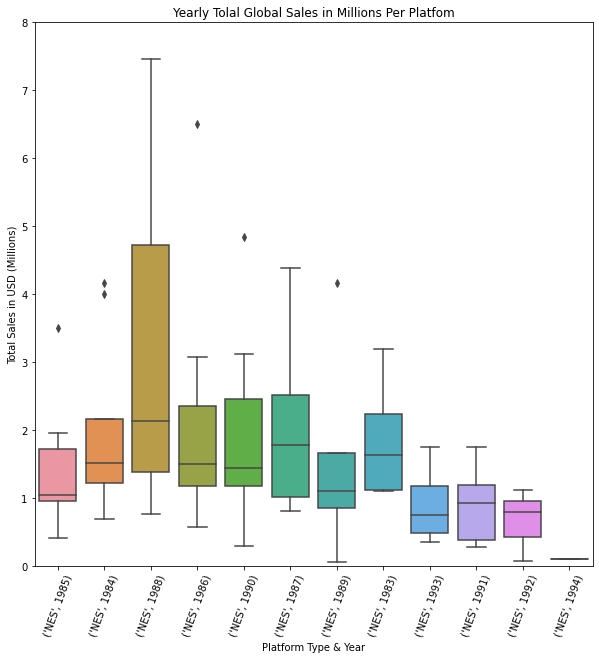

In [44]:
#total_sales each each based on platform
nes_sales=nes_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
nes_plot=sb.boxplot(data=nes_sales)
nes_plot.set(ylim=(0,8))
nes_plot.set_xticklabels(nes_plot.get_xticklabels(),rotation=70)
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* For NES platform, it appears that year 1987-1988 had the highest total sales.

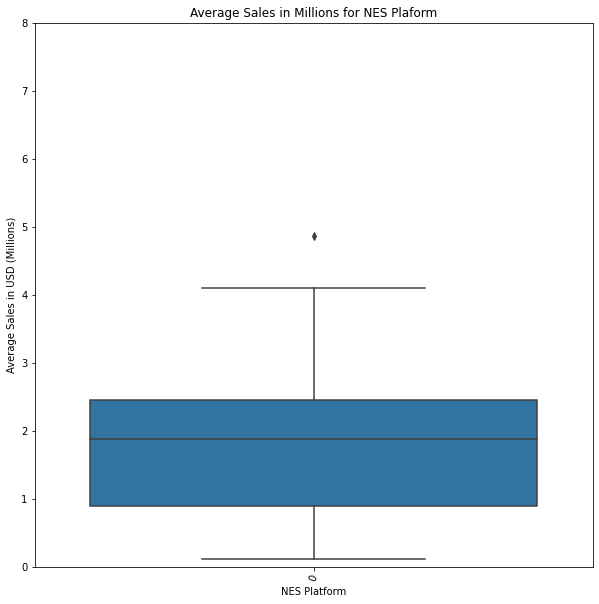

In [45]:
nes_avgsales=nes_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
nes_plot=sb.boxplot(data=nes_avgsales)
nes_plot.set(ylim=(0,8))
nes_plot.set_xticklabels(nes_plot.get_xticklabels(),rotation=70)
plt.xlabel("NES Platform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Sales in Millions for NES Plaform")
plt.show()

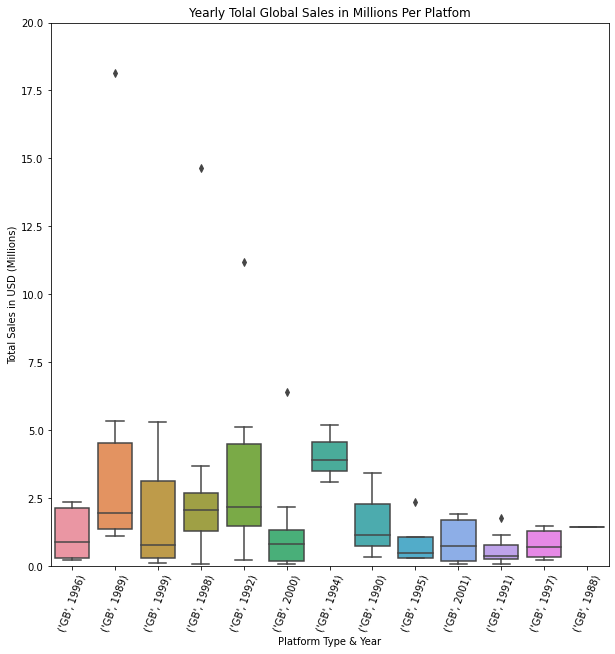

In [46]:
gb=gb_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
gb_plot=sb.boxplot(data=gb)
gb_plot.set_xticklabels(gb_plot.get_xticklabels(),rotation=70)
gb_plot.set(ylim=(0, 20))
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* As for GB, 1994 seemed to be the best year with respect to total sales.

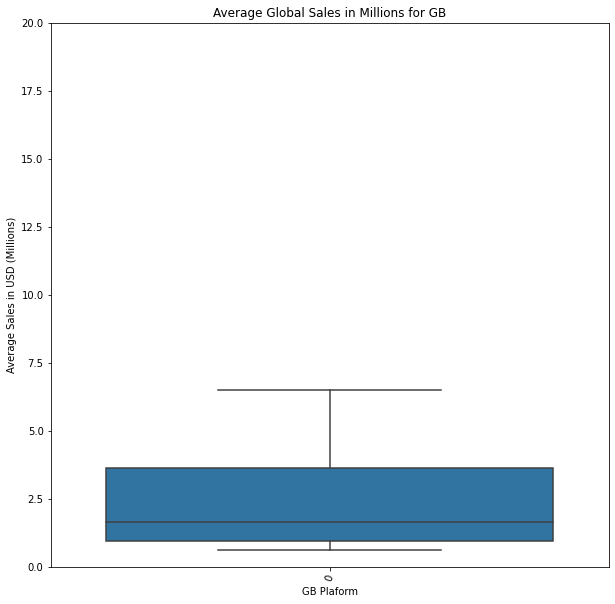

In [47]:
gbavg=gb_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
gb_plot=sb.boxplot(data=gbavg)
gb_plot.set_xticklabels(gb_plot.get_xticklabels(),rotation=70)
gb_plot.set(ylim=(0, 20))
plt.xlabel("GB Plaform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Global Sales in Millions for GB")
plt.show()

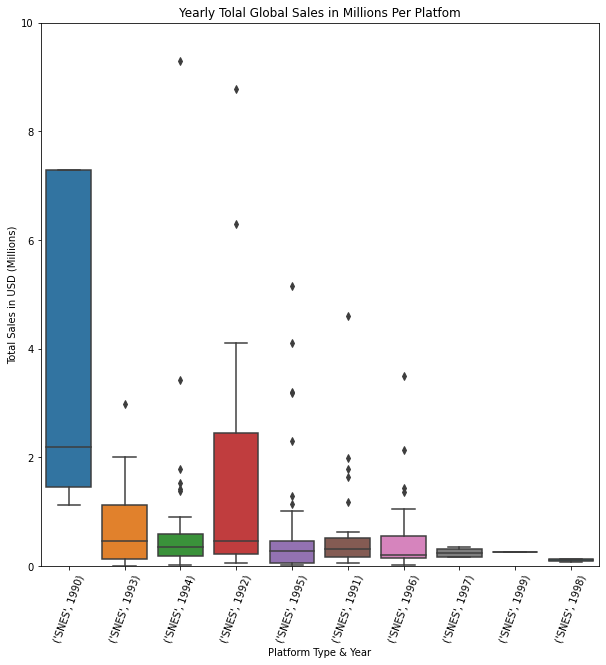

In [48]:
snes_sales=snes_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
snes_plot=sb.boxplot(data=snes_sales)
snes_plot.set_xticklabels(snes_plot.get_xticklabels(),rotation=70)
snes_plot.set(ylim=(0, 10))
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* SNES appeared to have peaked in total sales in 1990, then just declined from there.

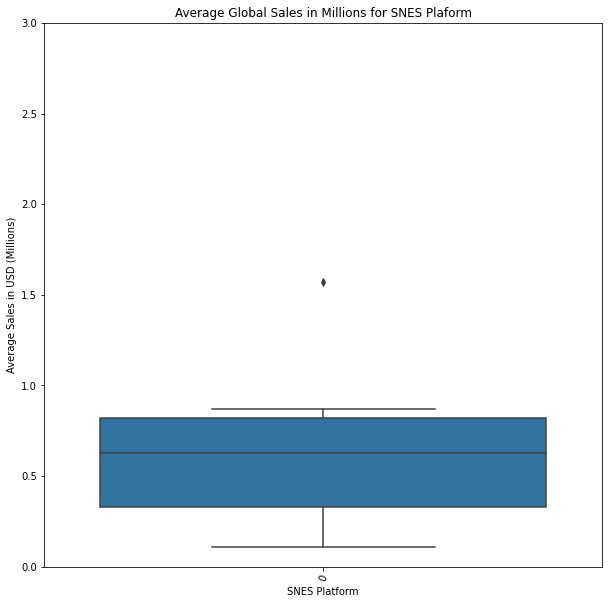

In [49]:
snes_avgsales=snes_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
snes_plot=sb.boxplot(data=snes_avgsales)
snes_plot.set_xticklabels(snes_plot.get_xticklabels(),rotation=70)
snes_plot.set(ylim=(0, 3))
plt.xlabel("SNES Platform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Global Sales in Millions for SNES Plaform")
plt.show()


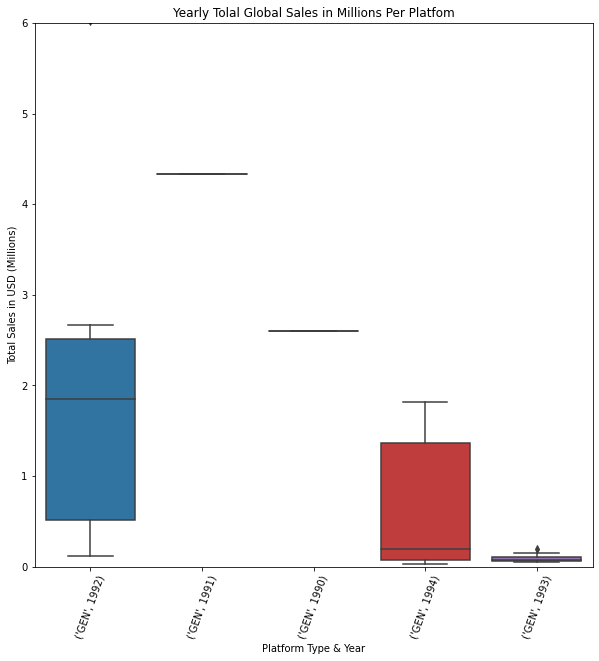

In [50]:
gen_sales=gen_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
gen_plot=sb.boxplot(data=gen_sales)
gen_plot.set_xticklabels(gen_plot.get_xticklabels(),rotation=70)
gen_plot.set(ylim=(0, 6))
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* For GEN platform, 1992 appears to have the highest total sales. After that sales declined greatly.

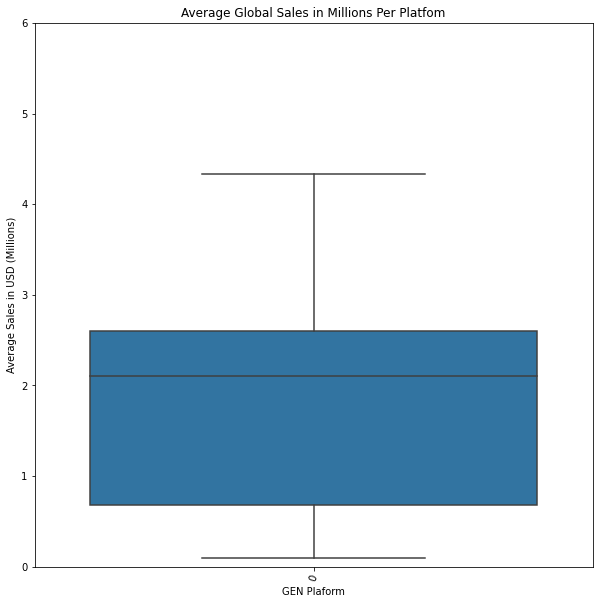

In [51]:
gen_avgsales=gen_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
gen_plot=sb.boxplot(data=gen_avgsales)
gen_plot.set_xticklabels(gen_plot.get_xticklabels(),rotation=70)
gen_plot.set(ylim=(0, 6))
plt.xlabel("GEN Plaform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Global Sales in Millions Per Platfom")
plt.show()

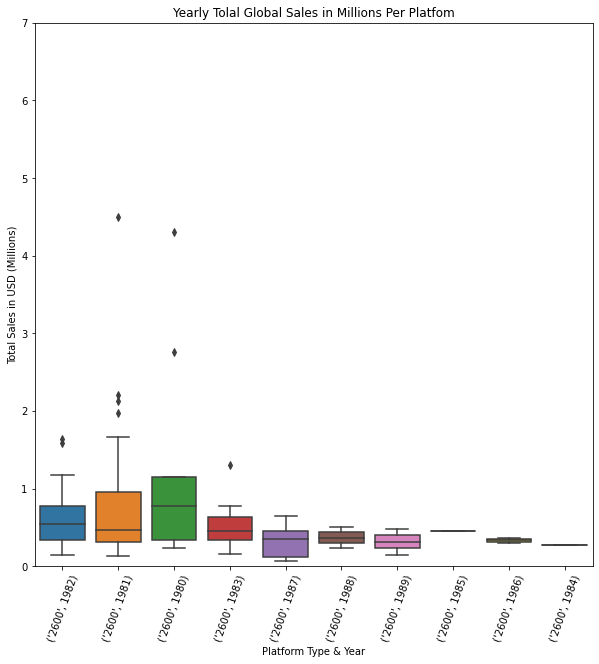

In [52]:
ts_sales=ts_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
ts_plot=sb.boxplot(data=ts_sales)
ts_plot.set_xticklabels(ts_plot.get_xticklabels(),rotation=70)
ts_plot.set(ylim=(0, 7))
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* The 2600 platform peaked in 1980 then generally declined in the later years.

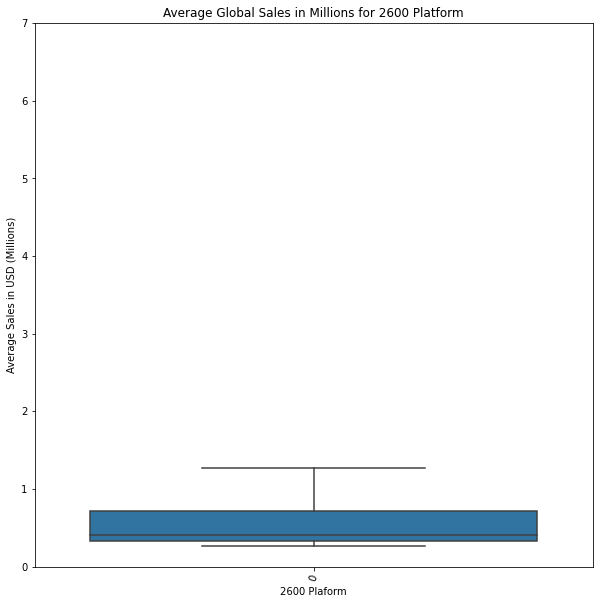

In [53]:
ts_avgsales=ts_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
ts_plot=sb.boxplot(data=ts_avgsales)
ts_plot.set_xticklabels(ts_plot.get_xticklabels(),rotation=70)
ts_plot.set(ylim=(0, 7))
plt.xlabel("2600 Plaform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Global Sales in Millions for 2600 Platform")
plt.show()

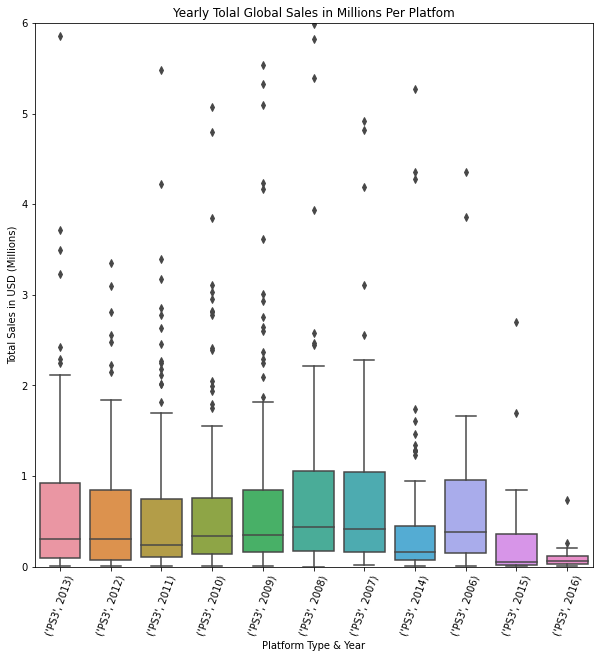

In [54]:
ps3_sales=ps3_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
ps3_plot=sb.boxplot(data=ps3_sales)
ps3_plot.set_xticklabels(ps3_plot.get_xticklabels(),rotation=70)
ps3_plot.set(ylim=(0, 6))
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* PS3 had the highest total sales in 2006, then declined thereafter.

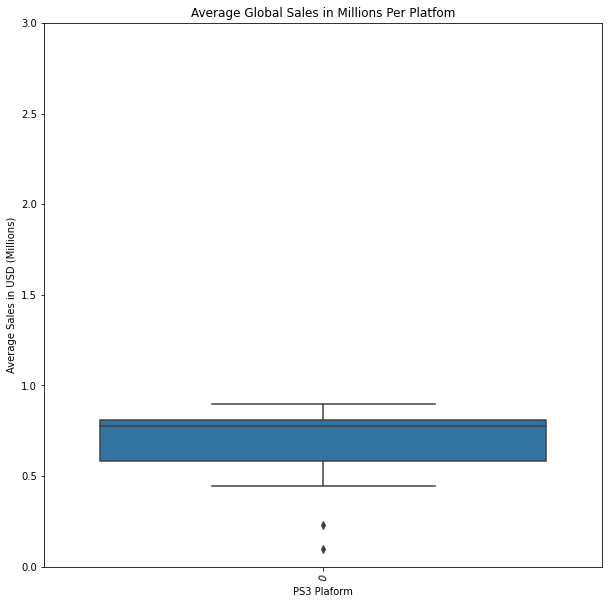

In [55]:
ps3_avgsales=ps3_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
ps3_plot=sb.boxplot(data=ps3_avgsales)
ps3_plot.set_xticklabels(ps3_plot.get_xticklabels(),rotation=70)
ps3_plot.set(ylim=(0, 3))
plt.xlabel("PS3 Plaform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Global Sales in Millions Per Platfom")
plt.show()

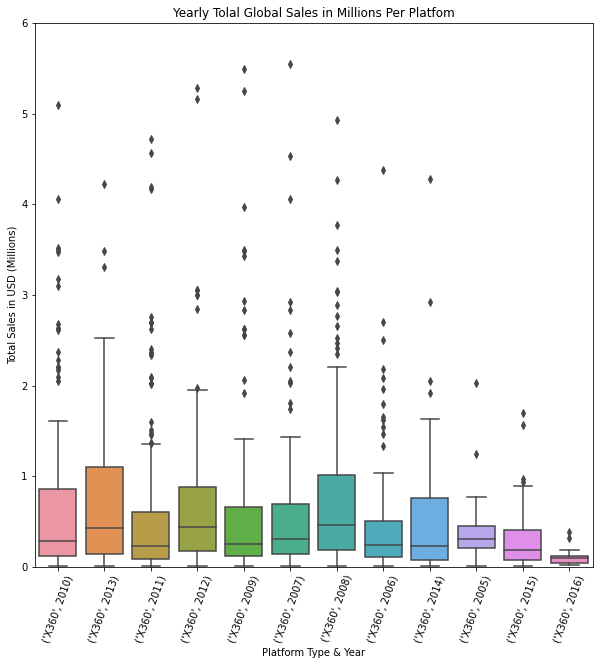

In [56]:
x360_sales=x360_data.pivot(columns=["platform", "year"], values="total_sales")
plt.figure(figsize=(10,10))
x360_plot=sb.boxplot(data=x360_sales)
x360_plot.set_xticklabels(x360_plot.get_xticklabels(),rotation=70)
x360_plot.set(ylim=(0, 6))
plt.xlabel("Platform Type & Year")
plt.ylabel("Total Sales in USD (Millions)")
plt.title("Yearly Tolal Global Sales in Millions Per Platfom")
plt.show()

* The largest total sales for X360 was in 2013, and fluctuated in the later years.

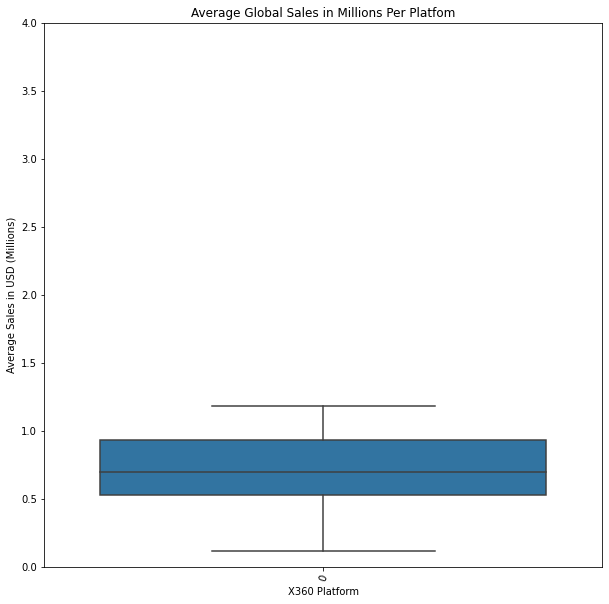

In [57]:
x360_avgsales=x360_data.pivot(columns=["platform", "year"], values="total_sales").mean()
plt.figure(figsize=(10,10))
x360_plot=sb.boxplot(data=x360_avgsales)
x360_plot.set_xticklabels(x360_plot.get_xticklabels(),rotation=70)
x360_plot.set(ylim=(0, 4))
plt.xlabel("X360 Platform")
plt.ylabel("Average Sales in USD (Millions)")
plt.title("Average Global Sales in Millions Per Platfom")
plt.show()

* For the correlational analysis, I will select "NES" Platorm to determine whether or not a correlation exists between sales and reviews.

In [58]:
gb_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38,1996
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,Unknown,30.26,1989
12,Pokemon Gold/Pokemon Silver,GB,1999-01-01,Role-Playing,9.00,6.18,7.20,0.71,0.0,0.0,Unknown,23.09,1999
21,Super Mario Land,GB,1989-01-01,Platform,10.83,2.71,4.18,0.42,0.0,0.0,Unknown,18.14,1989
30,Pokémon Yellow: Special Pikachu Edition,GB,1998-01-01,Role-Playing,5.89,5.04,3.12,0.59,0.0,0.0,Unknown,14.64,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11834,Mega Man Xtreme,GB,2000-01-01,Platform,0.00,0.00,0.07,0.00,0.0,0.0,Unknown,0.07,2000
11847,Mega Man Xtreme 2,GB,2001-01-01,Platform,0.00,0.00,0.07,0.00,0.0,0.0,Unknown,0.07,2001
11982,Metal Gear Solid,GB,2000-01-01,Action,0.00,0.00,0.07,0.00,0.0,0.0,Unknown,0.07,2000
12143,Power Pro GB,GB,1998-01-01,Sports,0.00,0.00,0.07,0.00,0.0,0.0,Unknown,0.07,1998


In [59]:
x360_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year
14,Kinect Adventures!,X360,2010-01-01,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82,2010
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,2013
29,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,2011
32,Call of Duty: Black Ops,X360,2010-01-01,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62,2010
35,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012-01-01,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01,2012
16622,World Snooker Championship 2007,X360,2007-01-01,Sports,0.00,0.01,0.00,0.00,0.0,0.0,Unknown,0.01,2007
16647,Metal Gear Solid HD Edition,X360,2011-01-01,Action,0.00,0.00,0.01,0.00,0.0,0.0,M,0.01,2011
16654,Ben 10 Omniverse 2,X360,2013-01-01,Action,0.00,0.01,0.00,0.00,0.0,5.1,E10+,0.01,2013


              na_sales  eu_sales  jp_sales  other_sales  critic_score  \
na_sales      1.000000  0.854828  0.486123     0.964488      0.309868   
eu_sales      0.854828  1.000000  0.461634     0.947864      0.281392   
jp_sales      0.486123  0.461634  1.000000     0.501547      0.184429   
other_sales   0.964488  0.947864  0.501547     1.000000      0.314175   
critic_score  0.309868  0.281392  0.184429     0.314175      1.000000   
user_score    0.207545  0.184795  0.121010     0.211755      0.790158   
total_sales   0.984380  0.932376  0.506603     0.992423      0.311756   
year         -0.014709  0.044633 -0.126640    -0.004677     -0.288848   

              user_score  total_sales      year  
na_sales        0.207545     0.984380 -0.014709  
eu_sales        0.184795     0.932376  0.044633  
jp_sales        0.121010     0.506603 -0.126640  
other_sales     0.211755     0.992423 -0.004677  
critic_score    0.790158     0.311756 -0.288848  
user_score      1.000000     0.207806 -0.1

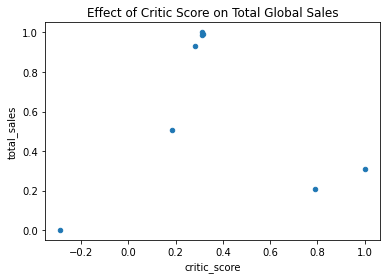


The correlation between critic score and total sales is weak & positive:  0.311756


In [60]:
print(x360_data.corr())
x360_data.corr().plot(kind="scatter", x="critic_score", y="total_sales")
plt.title("Effect of Critic Score on Total Global Sales")
plt.show()
print()
print("The correlation between critic score and total sales is weak & positive:  0.311756")

              na_sales  eu_sales  jp_sales  other_sales  critic_score  \
na_sales      1.000000  0.854828  0.486123     0.964488      0.309868   
eu_sales      0.854828  1.000000  0.461634     0.947864      0.281392   
jp_sales      0.486123  0.461634  1.000000     0.501547      0.184429   
other_sales   0.964488  0.947864  0.501547     1.000000      0.314175   
critic_score  0.309868  0.281392  0.184429     0.314175      1.000000   
user_score    0.207545  0.184795  0.121010     0.211755      0.790158   
total_sales   0.984380  0.932376  0.506603     0.992423      0.311756   
year         -0.014709  0.044633 -0.126640    -0.004677     -0.288848   

              user_score  total_sales      year  
na_sales        0.207545     0.984380 -0.014709  
eu_sales        0.184795     0.932376  0.044633  
jp_sales        0.121010     0.506603 -0.126640  
other_sales     0.211755     0.992423 -0.004677  
critic_score    0.790158     0.311756 -0.288848  
user_score      1.000000     0.207806 -0.1

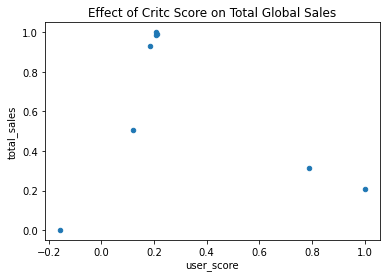


The correlation between user score and total sales is weak & positive: 0.207806


In [61]:
print(x360_data.corr())
x360_data.corr().plot(kind="scatter", x="user_score", y="total_sales")
plt.title("Effect of Critc Score on Total Global Sales")
plt.show()
print()
print("The correlation between user score and total sales is weak & positive: 0.207806")

In [62]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'year'],
      dtype='object')

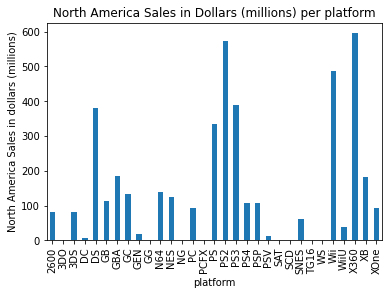

In [64]:
games_filtered_year.groupby(["platform"])["na_sales"].sum().plot(kind="bar")
plt.ylabel("North America Sales in dollars (millions)")
plt.title("North America Sales in Dollars (millions) per platform")
plt.show()

* The top 5 platforms for na_sales include:
* 1.X360
* 2.PS2
* 3.Wii
* 4.PS3
* 5.DS

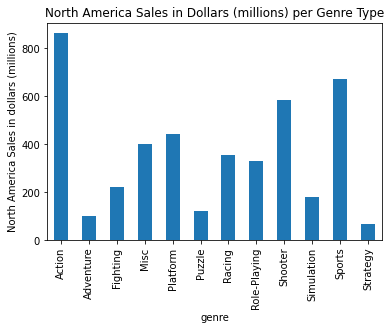

In [65]:
games_filtered_year.groupby(["genre"])["na_sales"].sum().plot(kind="bar")
plt.ylabel("North America Sales in dollars (millions)")
plt.title("North America Sales in Dollars (millions) per Genre Type")
plt.show()

* The top 5 genres of na_sales include:
    1. Action
    2.Sports
    3.Shooter
    4.Platform
    5.Misc

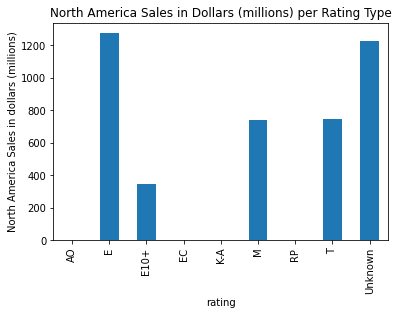

In [66]:
games_filtered_year.groupby(["rating"])["na_sales"].sum().plot(kind="bar")
plt.ylabel("North America Sales in dollars (millions)")
plt.title("North America Sales in Dollars (millions) per Rating Type")
plt.show()

* ESRB ratings for na_sales region seems to be predominantly "E" ratings. So, it appears that video games with "E" rating seem to sell more for some reason.

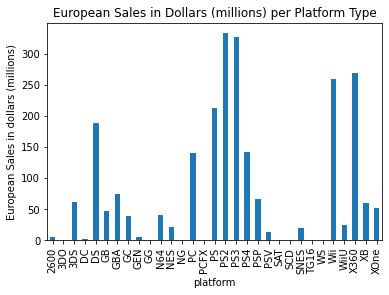

In [67]:
games_filtered_year.groupby(["platform"])["eu_sales"].sum().plot(kind="bar")
plt.ylabel("European Sales in dollars (millions)")
plt.title("European Sales in Dollars (millions) per Platform Type")
plt.show()

* The top 5 platforms for eu_sales are:
    1. PS2
    2.PS3
    3.X360
    4.Wii
    5.PS

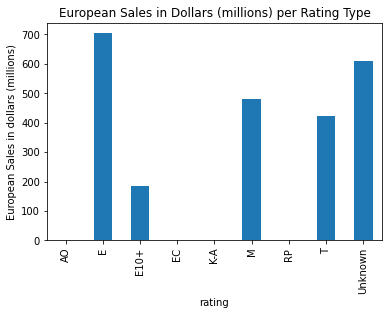

In [68]:
games_filtered_year.groupby(["rating"])["eu_sales"].sum().plot(kind="bar")
plt.ylabel("European Sales in dollars (millions)")
plt.title("European Sales in Dollars (millions) per Rating Type")
plt.show()

* In the EU region, video games with "E" appear to have the most sales.

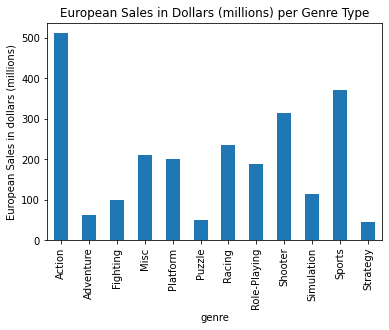

In [69]:
games_filtered_year.groupby(["genre"])["eu_sales"].sum().plot(kind="bar")
plt.ylabel("European Sales in dollars (millions)")
plt.title("European Sales in Dollars (millions) per Genre Type")
plt.show()

* Top 5 genre for EU:
1. Action
2.Sports
3.Shooter
4.Racing
5.Misc

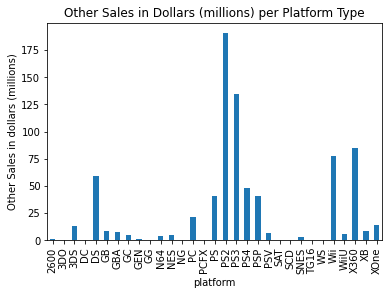

In [70]:
games_filtered_year.groupby(["platform"])["other_sales"].sum().plot(kind="bar")
plt.ylabel("Other Sales in dollars (millions)")
plt.title("Other Sales in Dollars (millions) per Platform Type")
plt.show()

* Top 5 platforms for Other Sales
1.PS2
2.PS3
3.X360
4.Wii
5.DS

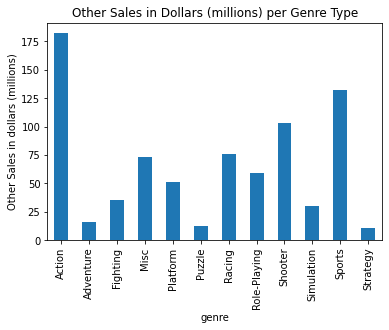

In [71]:
games_filtered_year.groupby(["genre"])["other_sales"].sum().plot(kind="bar")
plt.ylabel("Other Sales in dollars (millions)")
plt.title("Other Sales in Dollars (millions) per Genre Type")
plt.show()

* Top 5 genres for other sales:
1.Action
2.Sports
3.Shooter
4.Racing
5.Misc

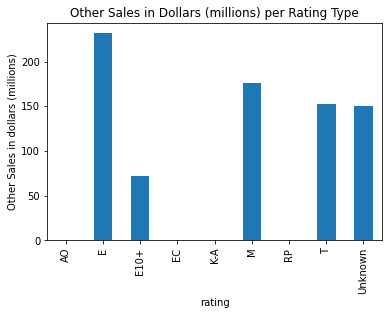

In [72]:
games_filtered_year.groupby(["rating"])["other_sales"].sum().plot(kind="bar")
plt.ylabel("Other Sales in dollars (millions)")
plt.title("Other Sales in Dollars (millions) per Rating Type")
plt.show()

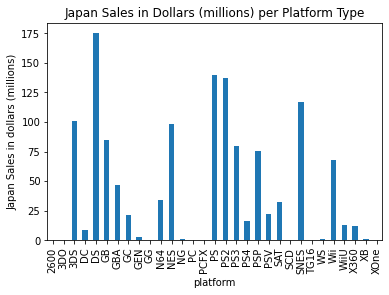

In [73]:
games_filtered_year.groupby(["platform"])["jp_sales"].sum().plot(kind="bar")
plt.ylabel("Japan Sales in dollars (millions)")
plt.title("Japan Sales in Dollars (millions) per Platform Type")
plt.show()

* The top 5 platforms for Japan Sales are:
1.DS
2.PS
3.PS2
4.SNES
5.3DS

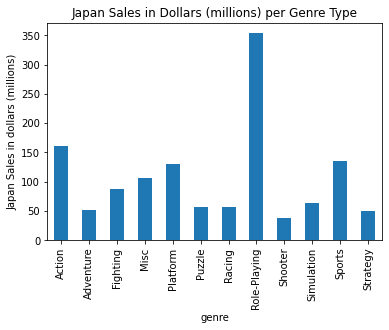

In [74]:
games_filtered_year.groupby(["genre"])["jp_sales"].sum().plot(kind="bar")
plt.ylabel("Japan Sales in dollars (millions)")
plt.title("Japan Sales in Dollars (millions) per Genre Type")
plt.show()

* The top 5 genre types for Japan Sales include:
1.Role Playing
2.Action
3.Sports
4.Platform
5.Misc
With Role Playing superceding the other types

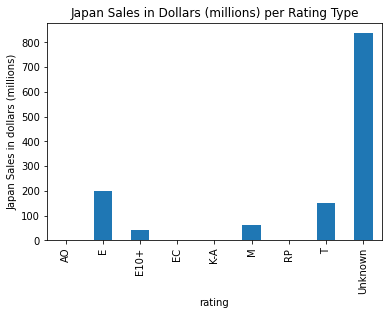

In [75]:
games_filtered_year.groupby(["rating"])["jp_sales"].sum().plot(kind="bar")
plt.ylabel("Japan Sales in dollars (millions)")
plt.title("Japan Sales in Dollars (millions) per Rating Type")
plt.show()

In this case, it seems as the videos with rating types that originally contained missing values sell the most in Japan. Again, this rating type is not known.

In [76]:
games["platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [77]:
pc_plat_data=games.query('platform =="PC"')
pc_avg=pc_plat_data["user_score"].mean()
print("PC Platform Average User Rating:", pc_avg)
xone_plat_data=games.query('platform == "XOne"')
xone_avg=xone_plat_data["user_score"].mean()
print("X-One Platform Average User Rating:", xone_avg)



PC Platform Average User Rating: 5.5745036572622775
X-One Platform Average User Rating: 4.805263157894737


In [78]:
print("Hypothesis One:")
print("H0: The average user rating of PC and XOne Platforms are the same")
print("H1: The average user rating of PC and XOne Platforms are different")


Hypothesis One:
H0: The average user rating of PC and XOne Platforms are the same
H1: The average user rating of PC and XOne Platforms are different


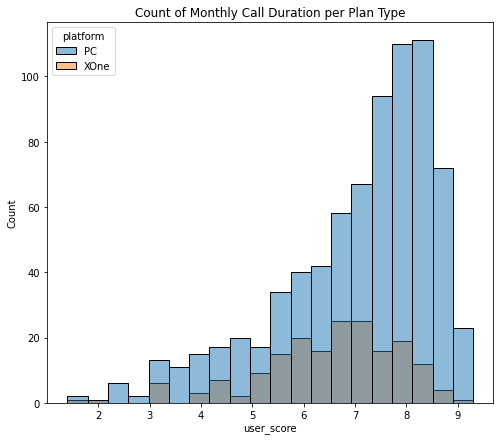

PC: Average for user_score is platform
PC    6.0
Name: user_score, dtype: float64
PC: Variance for user_score is platform
PC    10.0
Name: user_score, dtype: float64
PC: SD for user_score is platform
PC    3.0
Name: user_score, dtype: float64
XOne: Average for user_score is platform
XOne    5.0
Name: user_score, dtype: float64
XOne: Variance for user_score is platform
XOne    10.0
Name: user_score, dtype: float64
XOne: SD for user_score is platform
XOne    3.0
Name: user_score, dtype: float64


In [79]:
games_refined=games.query('platform == "PC" or platform == "XOne"')
games_refined2=games_refined.query('user_score != 0')
a= pc_plat_data.groupby("platform")["user_score"]
b= xone_plat_data.groupby("platform")["user_score"]

def user_score_stats(user_score):
    fig, ax=plt.subplots(figsize=(8,7))
    ax=sb.histplot(games_refined2, x="user_score", hue="platform")
    
    pc_mean= round(a.mean())
    pc_var= round(a.var())
    pc_std= round(a.std())
    xone_mean=round(b.mean())
    xone_var= round(b.var())
    xone_std= round(b.std())
    plt.title("Count of Monthly Call Duration per Plan Type")
    plt.show()
    print("PC: Average for", user_score, "is", pc_mean)
    print("PC: Variance for", user_score, "is", pc_var)
    print("PC: SD for", user_score, "is", pc_std)

    print("XOne: Average for", user_score, "is", xone_mean)
    print("XOne: Variance for", user_score, "is", xone_var)
    print("XOne: SD for", user_score, "is", xone_std)
    
user_score_stats("user_score")


* Note that I omitted all values of 0 for user_score here because those values indicated missing values (except for one row which is mentioned above. The large numbers of zeros will have an impact on the average and std deviation, which is why I choose to remove them from the calculations. 


* It is clear to see that PC platforms appear to have more higher user ratings as compared to X-One Platforms. This also indicated by the difference in average user score ratings: PC platforms have an average user score of 6 while XOne has an average user score rating of 5.

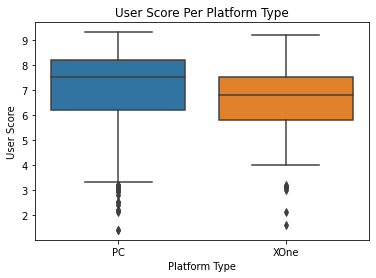

In [80]:
h=games_refined2.pivot(columns="platform", values="user_score")
sb.boxplot(data=h)
plt.xlabel("Platform Type")
plt.ylabel("User Score")
plt.title("User Score Per Platform Type")
plt.show()


* The median for PC is higher than XOne when it comes to user ratings

In [81]:
games_refined2.groupby("platform")["user_score"].mean()

platform
PC      7.065960
XOne    6.521429
Name: user_score, dtype: float64

In [82]:
from scipy import stats as st
from scipy.stats import levene 

In [83]:
sample1=pc_plat_data["user_score"]
sample2=xone_plat_data["user_score"]
print(sample1, sample2)

85       7.6
138      7.3
192      4.0
195      0.0
218      8.2
        ... 
16690    0.0
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 957, dtype: float64 99       0.0
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    0.0
16660    6.7
16672    0.0
Name: user_score, Length: 247, dtype: float64


In [84]:
pvalue_lev= st.levene(sample1, sample2)
pvalue_lev
print("Variance of sample 1 & 2 are not equal", pvalue_lev)

Variance of sample 1 & 2 are not equal LeveneResult(statistic=0.009220785951279878, pvalue=0.9235167844202709)


In [85]:
def t_test(sample1, sample2, alpha=.05):
    p_value_levene=st.levene(sample1,sample2).pvalue
    if p_value_levene < alpha:
        option_var=False
    else:
        option_var=True
    p_value= st.ttest_ind(sample1, sample2, equal_var=option_var).pvalue
    print("P_value, ", p_value)
    if p_value < alpha:
        print("Reject H0, average user ratings of PC platforms and X360 Platforms are not equal.")
    else:
        print("Fail to reject H0, average user ratings of PC platfomrs and X360 Platforms are equal.")
t_test(sample1, sample2)

P_value,  0.0007068097266608117
Reject H0, average user ratings of PC platforms and X360 Platforms are not equal.


In [86]:
print("Hypothesis Two:")
print("H0: Average user ratings for the Action and Sports genres are the same.")
print("H1: Average user ratings for the Action and Sports genres are different")


Hypothesis Two:
H0: Average user ratings for the Action and Sports genres are the same.
H1: Average user ratings for the Action and Sports genres are different


In [87]:
games["genre"].unique()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'year'],
      dtype='object')

In [88]:
action= games.query('genre =="Action"')
action
sports=games.query('genre == "Sports"')
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009
13,Wii Fit,Wii,2007-01-01,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70,2007
15,Wii Fit Plus,Wii,2009-01-01,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80,2009
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008-01-01,Sports,0.00,0.00,0.00,0.00,0.0,0.0,Unknown,0.00,2008
16688,Outdoors Unleashed: Africa 3D,3DS,2011-01-01,Sports,0.01,0.00,0.00,0.00,0.0,0.0,T,0.01,2011
16693,PGA European Tour,N64,2000-01-01,Sports,0.01,0.00,0.00,0.00,0.0,0.0,Unknown,0.01,2000
16700,Mezase!! Tsuri Master DS,DS,2009-01-01,Sports,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,0.01,2009


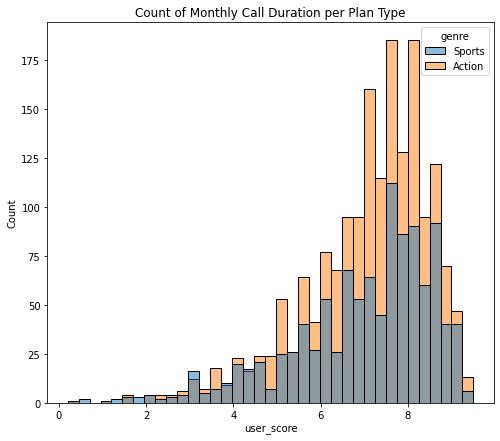

Action: Average for user_score is genre
Action    4.0
Name: user_score, dtype: float64
Action: Variance for user_score is genre
Action    13.0
Name: user_score, dtype: float64
Action: SD for user_score is genre
Action    4.0
Name: user_score, dtype: float64
Sports: Average for user_score is genre
Sports    3.0
Name: user_score, dtype: float64
Sports: Variance for user_score is genre
Sports    13.0
Name: user_score, dtype: float64
Sports: SD for user_score is genre
Sports    4.0
Name: user_score, dtype: float64


In [89]:
games_refined3=games.query('genre == "Sports" or genre == "Action"')
games_refined4=games_refined3.query('user_score != 0')
x= action.groupby("genre")["user_score"]
y= sports.groupby("genre")["user_score"]

def user_score_stats2(user_score):
    fig, ax=plt.subplots(figsize=(8,7))
    ax=sb.histplot(games_refined4, x="user_score", hue="genre")
    
    action_mean= round(x.mean())
    action_var= round(x.var())
    action_std= round(x.std())
    sports_mean=round(y.mean())
    sports_var= round(y.var())
    sports_std= round(y.std())
    plt.title("Count of Monthly Call Duration per Plan Type")
    plt.show()
    print("Action: Average for", user_score, "is", action_mean)
    print("Action: Variance for", user_score, "is", action_var)
    print("Action: SD for", user_score, "is", action_std)

    print("Sports: Average for", user_score, "is", sports_mean)
    print("Sports: Variance for", user_score, "is", sports_var)
    print("Sports: SD for", user_score, "is", sports_std)
    
user_score_stats2("user_score")


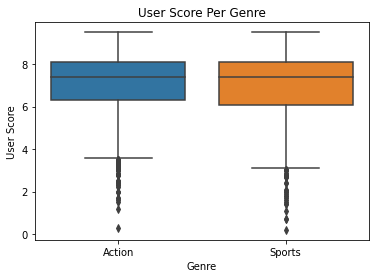

In [90]:
l=games_refined4.pivot(columns="genre", values="user_score")
sb.boxplot(data=l)
plt.xlabel("Genre")
plt.ylabel("User Score")
plt.title("User Score Per Genre")
plt.show()

* The distribution of user ratings for both genres are very similar, with the medians looking to be the same here.

In [91]:
games_refined4.groupby("genre")["user_score"].mean()

genre
Action    7.058129
Sports    6.951434
Name: user_score, dtype: float64

In [92]:
from scipy import stats as st
from scipy.stats import levene 

In [93]:
sample2=action["user_score"]
sample3=sports["user_score"]
print(sample2, sample3)

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16692    7.6
16694    0.0
16695    0.0
16699    0.0
16710    0.0
Name: user_score, Length: 3307, dtype: float64 0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    0.0
16688    0.0
16693    0.0
16700    0.0
16711    0.0
Name: user_score, Length: 2306, dtype: float64


In [94]:
pvalue_lev2= st.levene(sample2, sample3)
pvalue_lev2
print("Variance of sample 2 & 3 are not equal", pvalue_lev2)

Variance of sample 2 & 3 are not equal LeveneResult(statistic=13.073075683521557, pvalue=0.0003022003682102092)


In [95]:
def t_test2(sample2, sample3, alpha=.05):
    p_value_levene3=st.levene(sample2,sample3).pvalue
    if p_value_levene3 < alpha:
        option_var=False
    else:
        option_var=True
    p_value1= st.ttest_ind(sample2, sample3, equal_var=option_var).pvalue
    print("P_value, ", p_value1)
    if p_value1 < alpha:
        print("Reject H0, average user ratings of the of Action genre and Sports genre are not equal")
    else:
        print("Fail to reject H0, average user ratings of Action genre and Sports genre are equal")
t_test2(sample2, sample3)

P_value,  7.207560019739062e-09
Reject H0, average user ratings of the of Action genre and Sports genre are not equal


# Overview
* In this dataset, over half of the data were missin or arbituarily labeled "tbd" for "to be determined". To treat the missing data, I filled them in with 0. I chose to do this as opposed to filling them in with random values as that would be to risk being incorrect about those values. 
* Two rows of the missing data found in the [name] column were dropped as they were missing values both in the [name] and [genre] columns and would not be rendered useful in later calculations due to that. 
* The datatypes of certain columns were change to make further calculations possible. These columns include converting the [user_score column] from object to float and convering the [year_of_release] column from object to datetime. In addition, additional columns were added on to the dataset including [total_sales] and [year]

# Conclusion
* The goal of this project was to identify factors that might determine whether or not a video game succeeds in terms of sales or not.Three factors that were analyzed in this project included whether or not the genre, type of plaform, or user rating had any effect on sales. Firstly, two correlational analyses were conducted to determine whether a correlation exists between (1) critic score and total global sales and (2) whether a correlation exists between user score and total global sales. The results indicated that a weak positive correlation exists between critic score and total global sales (.311) as well as between user score and total gloabl scales (.207). The magnitude of this correlation is rather small and as stated before a large portion of data was missing  thus conducting a correlational analysis on larger dataset would be beneficial in confirming these results. 


* Furthermore, two independent samples t-tests were conducted to (1) determine whether the average user rating scores of PC platforms and X360 platforms are the same as well as (2) determine whether average user ratings of video games with Action genre and Sports genres are different. Upon conducting the independent samples t-test, it was determined that we (1) rejected the null hypothesis (p-value=0.000706): average user ratings of PC platforms and X360 Platforms are different. Additionally, we also (2) rejected the null hypothesis (p-value= 7.21e-09), average user ratings of Action genre and Sports genre games are different. We can generally conclude from this analysis that ratings of games can vary based on genre and platform. Further analysis should be conducted on larger datasets with more data on ratings information to confirm these conclusions.